## TASK 6.5 Machine Learning Part 2

### This script contains the following:

#### 1.  Import all necessary libraries.
#### 2.  Import data and conduct any necessary cleaning, manipulations, and reprocessing.
       - Consistency Checks
       - Create a dataframe with only numerical variable
       - Standardize the new dataframe       
####  3.  K-means Clustering with PCA.
####  4.  Number of clusters used in the k-means algorithm.
####  5.  Run the k-means algorithm.
####  6. Attach a new column, clusters visualization.
####  7. Create a few different visualizations.
####  8.  Discuss how and why the clusters make sense.
####  9. Calculate the descriptive statistics for the clusters using the groupby() function and discuss the findings.
#### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

### 1. Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # That is this spesific k-mean algorithm from scikit-learn, that will be used.
from sklearn.preprocessing import StandardScaler # For standardizing features I'll the StandardScaler module.
from sklearn.decomposition import PCA # another module from sk for machine learning.
import pylab as pl # Pylab is a convenience module that bulk import matplotlib.

import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

### 2. Import Data Set

In [2]:
# define a path

path = r'C:\Users\junio\OneDrive\Career Foundry Project\Achievement 6\02-2024 Brazilian E-Commerce'

In [3]:
# Import the latest version of the data

df_all = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'all_derived_columns.csv'), index_col = False)

In [4]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [5]:
# Set display options to show all rows and columns

pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

#### Consistency Checks

In [6]:
df_all.shape

(101992, 30)

In [7]:
df_all.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1


In [9]:
df_all['item_count'].value_counts(dropna = False).head()

item_count
1    89267
2     8975
3     2075
4      871
5      406
Name: count, dtype: int64

##### The amount of items included per order do vary a lot, but with most of them having 1 to two items per order, I will group the variable 'item_coun' by the variable 'order_id' to derive a column with the avg. items per order, so I may have more insights.

In [10]:
# Group the df_all_avg_delivery dataframe by the 'order_id' column 

# the transform() function is applied on the 'review_score' column with the 'mean' argument 

df_all['avg_items_per_order'] = df_all.groupby(['order_id'])['item_count'].transform('mean')

In [304]:
# Export data set with the new derived flag 'avg_items_per_order' per order

df_all.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_all_avg_items_flag.csv'), index = False)

In [12]:
df_all['avg_items_per_order'].value_counts().head()

avg_items_per_order
1.0    80342
1.5    13720
2.0     3641
2.5     1848
3.5     1058
Name: count, dtype: int64

In [13]:
df_all.head()

,order_id,customer_id,purchase_date,delivered_customer_date,estimated_delivery_date,item_count,product_id,seller_id,price,freight_value,prod_category,Price category,review_score,review_title,review_comment,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_city,seller_state,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,Low price,4,NaN,"Não testei o produto ainda, mas ele veio corre...",7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.576475,-46.587290,9350,maua,SP,-23.680048,-46.443593,8,4.5,4.0,2,1.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,2017-08-18 14:44:43,2017-08-28,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,Low price,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,-23.564807,-46.533982,9350,maua,SP,-23.680048,-46.443593,2,2.0,4.0,1,1.0
2,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,2017-11-07 18:04:59,2017-11-13,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,Low price,3,NaN,NaN,e781fdcc107d13d865fc7698711cc572,88032,florianopolis,SC,-27.532709,-48.494774,9350,maua,SP,-23.680048,-46.443593,14,14.0,3.0,1,1.0
3,44905b3e611d2f738de87a2cca4961b2,93a705448fbbe8d2c10f151c0510cd0c,2017-08-06 21:03:00,2017-08-14 19:36:05,2017-08-29,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,44.49,15.10,cool_stuff,Low price,5,NaN,muito bom!,1bbae4260b7887325fccae14a592c130,39100,diamantina,MG,-18.241008,-43.602296,9350,maua,SP,-23.680048,-46.443593,7,7.0,5.0,1,1.0
4,0010b2e5201cc5f1ae7e9c6cc8f5bd00,57ef317d4818cb42680fc9dfd13867ce,2017-09-11 17:39:33,2017-09-23 13:21:21,2017-09-27,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,16.60,cool_stuff,Low price,5,NaN,NaN,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,-22.961106,-43.211960,9350,maua,SP,-23.680048,-46.443593,11,11.0,5.0,1,1.0


In [14]:
df_all.describe()

,item_count,price,freight_value,review_score,customer_zip_code_prefix,customer_geolocation_lat,customer_geolocation_lng,seller_zip_code_prefix,seller_geolocation_lat,seller_geolocation_lng,delivery_time,avg_delivery_time,avg_review_score,sum_of_orders_by_customer,avg_items_per_order
count,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000,101992.000000
mean,1.195751,121.021598,19.905562,4.083918,34656.305661,-21.370330,-46.246364,24826.677700,-22.857692,-47.311283,11.872049,11.872049,4.083918,1.517394,1.195751
std,0.683238,180.401268,15.648602,1.345752,29840.547280,5.427289,3.971904,27827.235103,2.552083,2.234588,9.292583,9.223741,1.343457,1.339144,0.540804
min,1.000000,0.850000,0.000000,1.000000,1003.000000,-33.689754,-72.669129,1001.000000,-32.086430,-63.894294,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,39.990000,13.067500,4.000000,11055.000000,-23.594309,-48.105344,7074.000000,-23.601262,-48.830526,6.000000,6.000000,4.000000,1.000000,1.000000
50%,1.000000,75.000000,16.260000,5.000000,23830.000000,-22.936341,-46.635821,13920.000000,-23.414752,-46.755983,10.000000,10.000000,5.000000,1.000000,1.000000
75%,1.000000,134.990000,21.120000,5.000000,57127.500000,-20.314239,-43.773125,28990.000000,-21.756113,-46.521585,15.000000,15.000000,5.000000,2.000000,1.000000
max,21.000000,6499.000000,409.680000,5.000000,99980.000000,42.184003,-8.723762,99730.000000,-2.496343,-34.854406,208.000000,208.000000,5.000000,24.000000,11.000000


In [15]:
df_all.dtypes

order_id                      object
customer_id                   object
purchase_date                 object
delivered_customer_date       object
estimated_delivery_date       object
item_count                     int64
product_id                    object
seller_id                     object
price                        float64
freight_value                float64
prod_category                 object
Price category                object
review_score                   int64
review_title                  object
review_comment                object
customer_unique_id            object
customer_zip_code_prefix       int64
customer_city                 object
customer_state                object
customer_geolocation_lat     float64
customer_geolocation_lng     float64
seller_zip_code_prefix         int64
seller_city                   object
seller_state                  object
seller_geolocation_lat       float64
seller_geolocation_lng       float64
delivery_time                  int64
a

#### Create a Dataframe including only numerical variables.

In [16]:
#select numerical columns
columns = ['item_count', 'price', 'freight_value', 'review_score', 'delivery_time', 'sum_of_orders_by_customer',
           'avg_items_per_order']

# Create a subset

df_cluster = df_all[columns]

In [17]:
df_cluster.head()

,item_count,price,freight_value,review_score,delivery_time,sum_of_orders_by_customer,avg_items_per_order
0,1,29.99,8.72,4,8,2,1.0
1,1,29.99,7.78,4,2,1,1.0
2,1,29.99,14.10,3,14,1,1.0
3,1,44.49,15.10,5,7,1,1.0
4,1,48.90,16.60,5,11,1,1.0


#### Standardize the dataframe in order to avoid bias and to optimize the module's performance 
      Because the observations in the choosen variables diver a lot, a standardization as a preprocessing method
      before running the kmean modul is pretty handy.

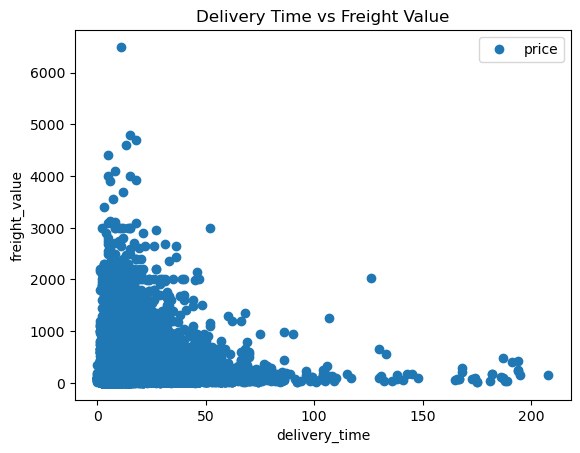

In [18]:
# Create a scatterplot using matplotlib for another look at how the some variables plot against each other.

df_cluster.plot(x = 'delivery_time', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Delivery Time vs Freight Value')  
plt.xlabel('delivery_time')  
plt.ylabel('freight_value')  
plt.show()

In [19]:
scaler = StandardScaler()

In [20]:
df_std = scaler.fit_transform(df_cluster)

##### Principal Component Analysis (PCA) applied to the standardized DataFrame 'df_std'
##### This statistical method will be used to simplify the complexity of the df by reducing its dimensionality while preserving  important information. It identifies the most significant patterns in the data and represents them as a set of orthogonal (uncorrelated) variables called principal components.      

In [21]:
pca = PCA()

In [22]:
pca.fit(df_std)

PCA()

In [23]:
# The attribute shows how much variance is explained by each of the seven individual components
pca.explained_variance_ratio_

array([0.37335239, 0.21932217, 0.16770581, 0.09824171, 0.07795364,
       0.04671865, 0.01670562])

Text(0, 0.5, 'Cumulative Explained Variance')

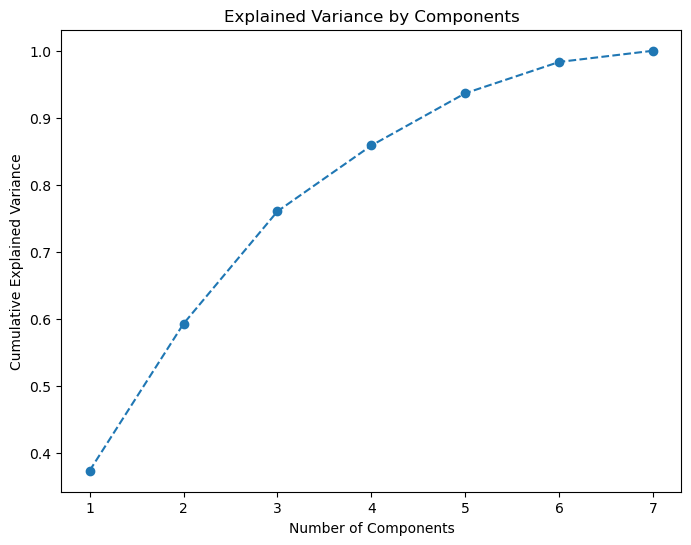

In [24]:
plt.figure(figsize = (8,6))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

##### according to reserach, the graph shows the amount of variance captured (on the y-axis) depending on the number of components are included (the x-axis). 'A rule of thumb is to preserve around 80 % of the variance. I decide to keep the next procedures with 5 components to cluster the data set later on.

#### Perform PCA 

In [25]:
# PCA with the chosen number of components (5)

pca = PCA(n_components = 5)

In [26]:
# Fit the model on the data with the selected number of components (5)

pca.fit(df_std)

PCA(n_components=5)

##### Calculated resulting components scores for the elements in our data set, that well be need in the next step

In [27]:
pca.transform(df_std)

array([[-8.04278400e-02, -8.91993400e-01, -3.25063853e-01,
        -2.50948261e-01,  6.32955071e-04],
       [-5.02195688e-01, -1.25288185e+00, -8.07289549e-02,
        -6.74369808e-01,  2.47690213e-01],
       [-3.92259255e-01, -1.24664887e-01, -1.06771441e+00,
        -3.29473601e-01,  1.78386986e-01],
       ...,
       [-1.03137187e+00,  3.52926913e+00,  2.46072131e+00,
         1.50103784e+00,  3.14941434e+00],
       [-1.09745323e+00,  3.70114329e+00,  2.35100971e+00,
         6.10652171e-01,  4.33577357e-01],
       [-7.14138226e-01,  2.10018469e-01,  3.90975798e-01,
         8.40790702e-01,  6.10615721e-01]])

In [28]:
scores_pca = pca.transform(df_std)

### 3. K-means Clustering with PCA

#### Elbow Technique

In [29]:
# Fit k-means using the transformed data from PCA

# For each value of K, we are calculating WCSS (Within-Cluster Sum of Square).
# WCSS is the sum of the squared distance between each point and the centroid in a cluster.

wcss = [] 
for i in range (1,31):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 62)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

#### Plotting the WCSS against the number of components on a graph.

Text(0, 0.5, 'K-means with PCA Clustering')

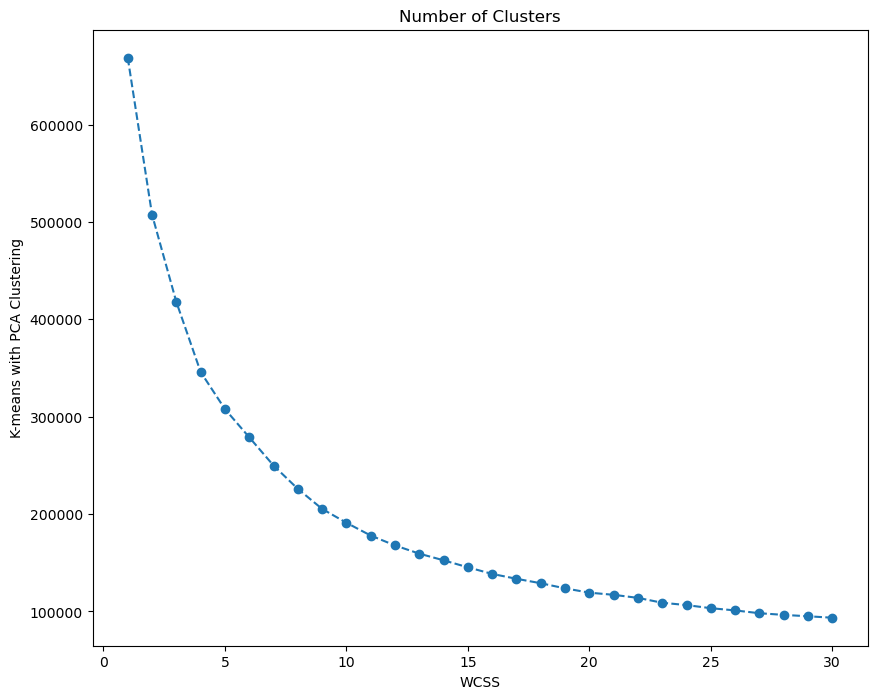

In [30]:
plt.figure(figsize = (10,8))
plt.plot(range(1,31), wcss, marker = 'o', linestyle = '--')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-means with PCA Clustering')

### 4. Decision about the number of clusters I’ll use in my k-means algorithm based on the chart.

##### The elbow method consists of looking for a kink or elbow in the WCSS graph. That is, the part of the graph before the elbow would be steeply declining, while the part after it is much smoother. In this instance, we see a clear change or curve around the 5-cluster mark. Therefore, I'll be keeping a five-cluster solution.

### 5. Run the k-means algorithm.

In [31]:
# Run the k-means algorithm with 5 clusters
# Same initializer and random state as before.

kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state = 62)

In [32]:
# Fit the data with the k-means pca model

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=62)

### 6. Attach a new column to the dataframe with the resulting clusters. This will allow me to create a visualization using the clusters.

In [33]:
# Convert scaled data to a pandas DataFrame

df_std_converted = pd.DataFrame(df_std, columns=df_cluster.columns)

In [34]:
# Fit the k-means object to the data.

kmeans_pca.fit(df_std_converted)

KMeans(n_clusters=5, random_state=62)

In [35]:
df_std_converted['clusters'] = kmeans_pca.fit_predict(df_std_converted)

In [36]:
df_std_converted.head()

,item_count,price,freight_value,review_score,delivery_time,sum_of_orders_by_customer,avg_items_per_order,clusters
0,-0.286506,-0.504609,-0.714800,-0.062358,-0.416684,0.360386,-0.361964,0
1,-0.286506,-0.504609,-0.774869,-0.062358,-1.062363,-0.386363,-0.361964,0
2,-0.286506,-0.504609,-0.370997,-0.805441,0.228996,-0.386363,-0.361964,0
3,-0.286506,-0.424232,-0.307094,0.680724,-0.524297,-0.386363,-0.361964,0
4,-0.286506,-0.399786,-0.211238,0.680724,-0.093844,-0.386363,-0.361964,0


### 7. Create a few different visualizations (e.g., scatterplots) using the clustered data. 
###     Try plotting different variables against each other to see the results in terms of the clusters.


In [37]:
df_std_converted['clusters'].value_counts()

clusters
0    69037
2    15399
1    11201
4     3864
3     2491
Name: count, dtype: int64

#### Scatterplot Price x Sum of orders by a customer

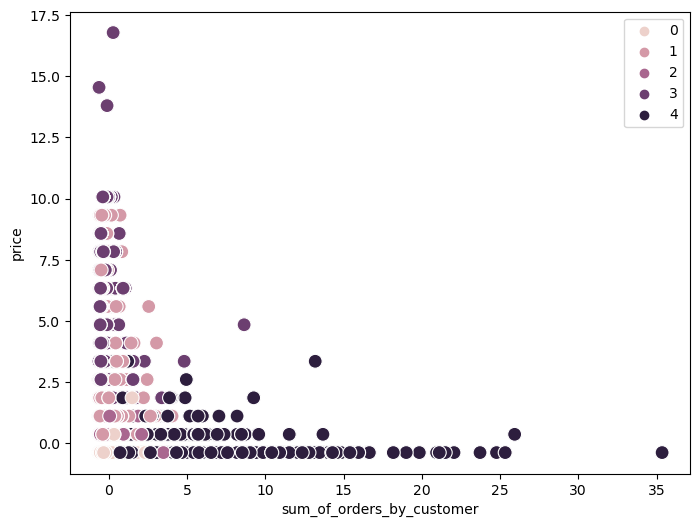

In [38]:
# Plot the clusters for the "sum_of_orders_by_customer" and "price" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['price'], y=df_std_converted['sum_of_orders_by_customer'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('sum_of_orders_by_customer') # Label x-axis.
plt.ylabel('price') # Label y-axis.
plt.show()

#### Scatterplot delivery time x review_score

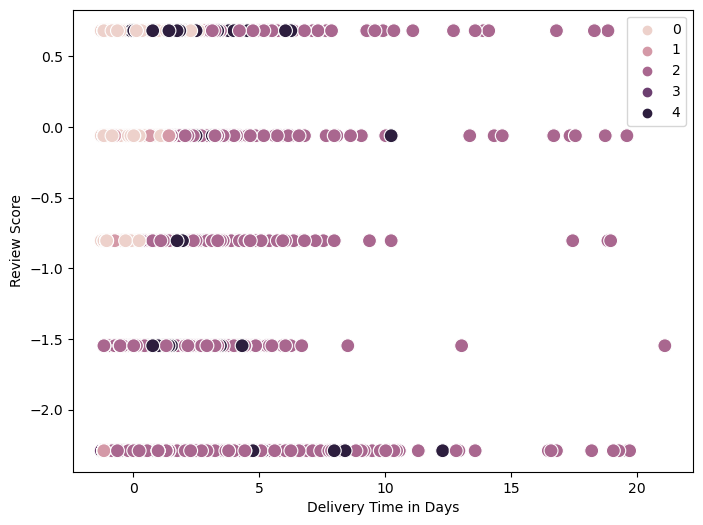

In [39]:
# Plot the clusters for the "delivery time" and "review_score" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['delivery_time'], y=df_std_converted['review_score'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Delivery Time in Days') # Label x-axis.
plt.ylabel('Review Score') # Label y-axis.
plt.show()

#### Scatterplot delivery time x freight value

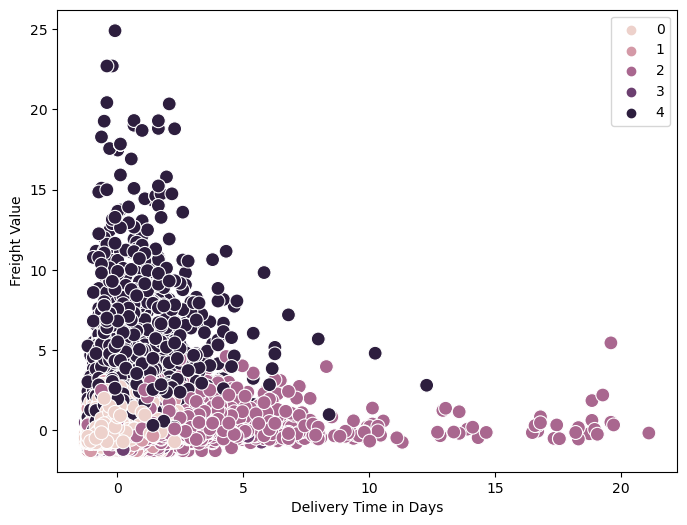

In [40]:
# Plot the clusters for the "delivery time" and "freight value" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['delivery_time'], y=df_std_converted['freight_value'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Delivery Time in Days') # Label x-axis.
plt.ylabel('Freight Value') # Label y-axis.
plt.show()

#### Scatterplot item_counts x sum_of_orders_by_customer

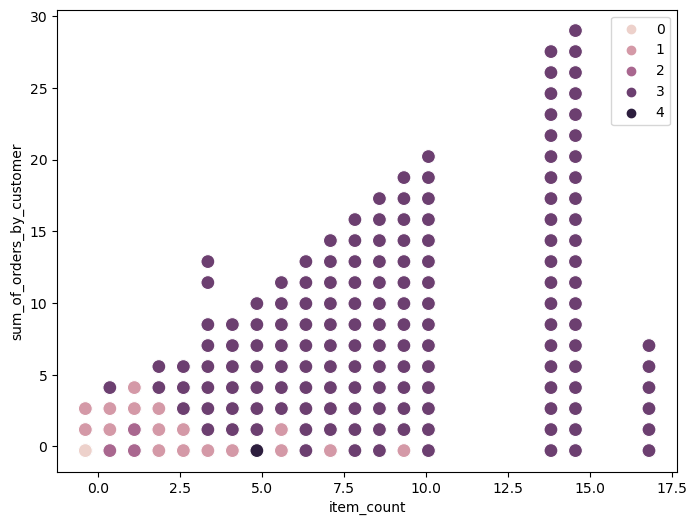

In [41]:
# Plot the clusters for the "item counts" and "fsum of order by customer" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['sum_of_orders_by_customer'], y=df_std_converted['item_count'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('item_count') # Label x-axis.
plt.ylabel('sum_of_orders_by_customer') # Label y-axis.
plt.show()

#### Scatterplot item_counts x sum_of_orders_by_customer

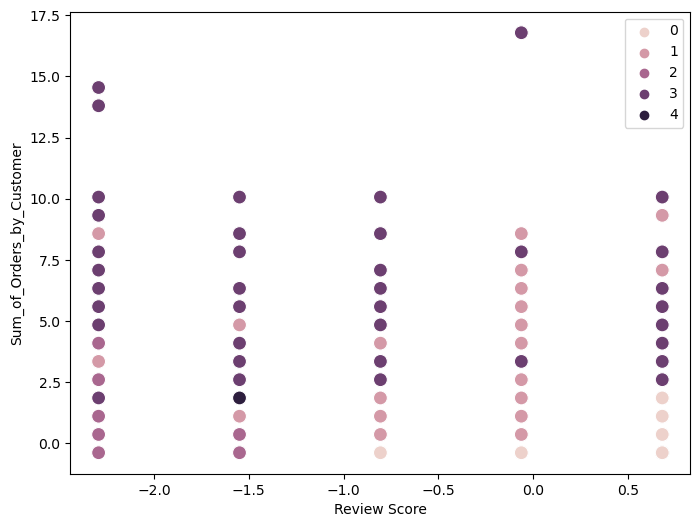

In [42]:
# Plot the clusters for the "sum of orders by customer" and "delivery time" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['review_score'], y=df_std_converted['sum_of_orders_by_customer'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Review Score') # Label x-axis.
plt.ylabel('Sum_of_Orders_by_Customer') # Label y-axis.
plt.show()

#### Scatterplot  avg_items_per_order x freight value

Text(0, 0.5, 'Avg. Items per Order')

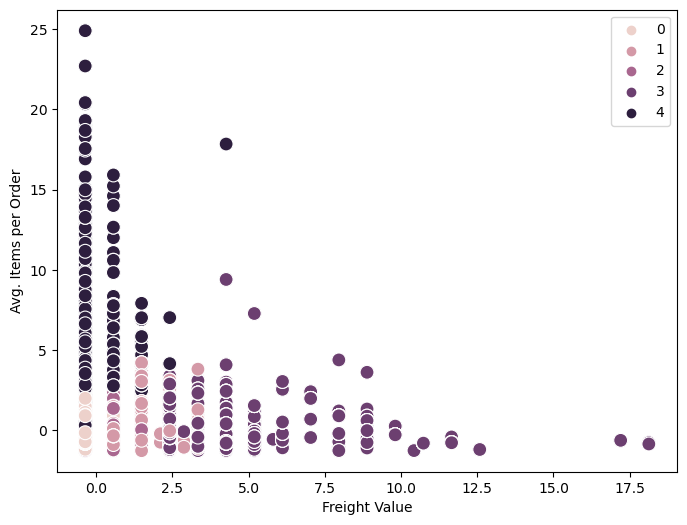

In [43]:
# Plot the clusters for the "delivery time" and "freight value" variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['avg_items_per_order'], y=df_std_converted['freight_value'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Freight Value') # Label x-axis.
plt.ylabel('Avg. Items per Order') # Label y-axis.

#### Scatterplot Avg. Items per Order x Products Price

Text(0, 0.5, 'Avg. Items per Order')

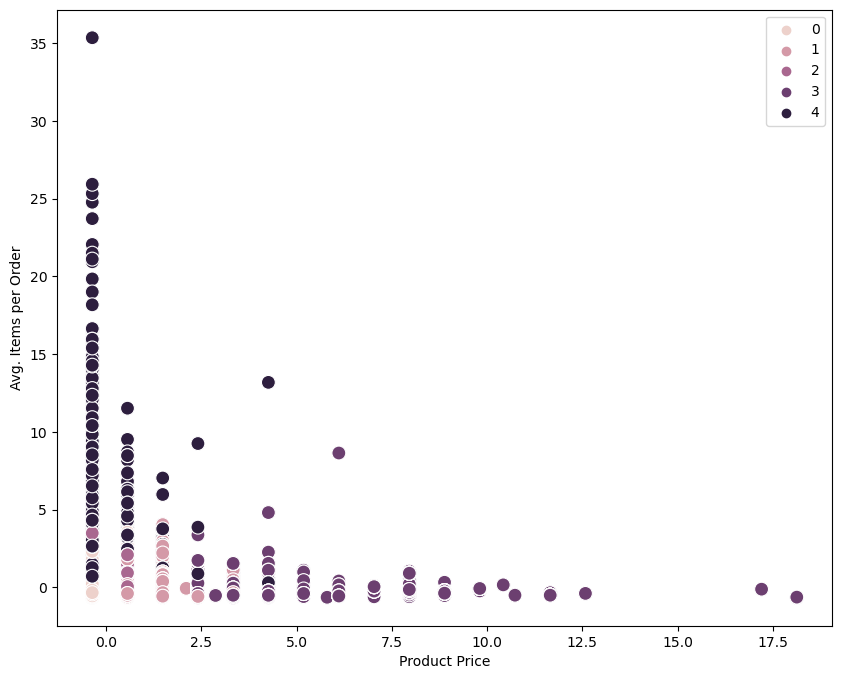

In [44]:
# Plot the clusters for the "avg_items_per_order" and "price" variables.

plt.figure(figsize=(10,8))
ax = sns.scatterplot(x=df_std_converted['avg_items_per_order'], y=df_std_converted['price'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Product Price') # Label x-axis.
plt.ylabel('Avg. Items per Order') # Label y-axis.

###  8. Discuss how and why the clusters make sense, or do not.

##### After plotting all the scatterplots with various combinations, I still do not identify any strong crystal patterns, besides a single one, the last one above, where I plot the Avg. Items per Order (dependent variable, y) x Products Price (independent variable, x).

#####  In this instance, we can observe a more similar pattern: the lower the product price, the higher the quantity of products a customer is buying per order, and vice versa; the higher the price of a product, the lower will be the quantity of product per order.

##### Below, the variables are plotted again, but now with the quantity of items per order rather than their average values, against the products' price.

#### Scatterplot Items per Order x Products Price

Text(0, 0.5, 'Item per Order')

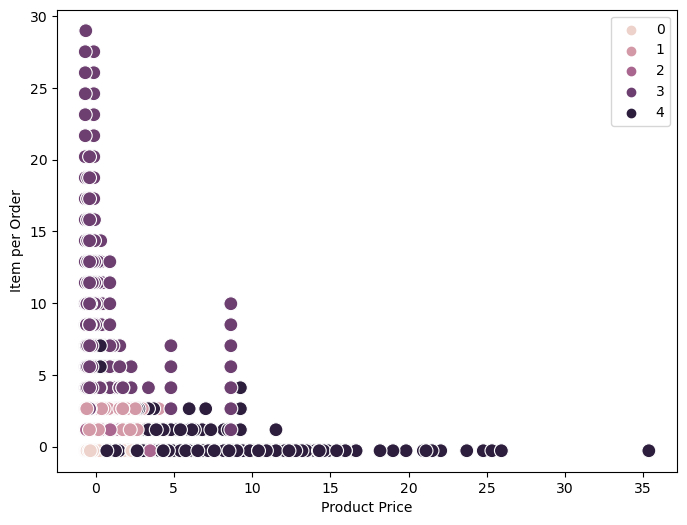

In [45]:
# Plot the clusters for the 'Items per Order' and 'Products Price' variables.

plt.figure(figsize=(8,6))
ax = sns.scatterplot(x=df_std_converted['price'], y=df_std_converted['item_count'], hue=kmeans_pca.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Product Price') # Label x-axis.
plt.ylabel('Item per Order') # Label y-axis.

### 9. Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

##### Because I had to use a PCA module to standardize my dataframe, I have many negative values within the descriptive variables, making it tricky for me to draw precise insights. However, looking at the values within the 'clusters' variable, we can see that most values are clustered into two clusters, namely, '0' and '2'.

##### Taking a closer look at the unique possible pattern observed previously, namely, both variables which demonstrate a reasonable pattern: 'item_count' per order and 'price', it seems to make sense.

In [46]:
df_std_converted.head()

,item_count,price,freight_value,review_score,delivery_time,sum_of_orders_by_customer,avg_items_per_order,clusters
0,-0.286506,-0.504609,-0.714800,-0.062358,-0.416684,0.360386,-0.361964,0
1,-0.286506,-0.504609,-0.774869,-0.062358,-1.062363,-0.386363,-0.361964,0
2,-0.286506,-0.504609,-0.370997,-0.805441,0.228996,-0.386363,-0.361964,0
3,-0.286506,-0.424232,-0.307094,0.680724,-0.524297,-0.386363,-0.361964,0
4,-0.286506,-0.399786,-0.211238,0.680724,-0.093844,-0.386363,-0.361964,0


In [47]:
df_std_converted['clusters'].value_counts()

clusters
0    69037
2    15399
1    11201
4     3864
3     2491
Name: count, dtype: int64

In [48]:
df_std_converted.groupby('clusters').agg({'item_count':['mean', 'median'], 
                          'price':['mean', 'median'], 
                           'freight_value':['mean', 'median'],
                           'review_score':['mean', 'median'],
                           'delivery_time':['mean', 'median'],
                           'sum_of_orders_by_customer':['mean', 'median'],
                           'avg_items_per_order':['mean', 'median']})

item_count               price           freight_value            \
               mean    median      mean    median          mean    median   
clusters                                                                    
0         -0.286506 -0.286506 -0.114041 -0.255108     -0.142222 -0.255332   
1          1.060825  1.177120 -0.246505 -0.365973     -0.187382 -0.294952   
2         -0.147737 -0.286506 -0.082349 -0.227946      0.036052 -0.147334   
3          4.412844  4.104372 -0.235281 -0.388146     -0.091556 -0.298786   
4         -0.212264 -0.286506  3.231966  2.654531      2.999575  2.662196   

         review_score           delivery_time            \
                 mean    median          mean    median   
clusters                                                  
0            0.420386  0.680724     -0.210151 -0.309070   
1           -0.047365  0.680724     -0.210901 -0.309070   
2           -1.771269 -2.291605      1.027237  0.659449   
3           -0.604680 -0.062358     -0.018545 -0.201457   
4            0.075143  0.680724      0.284223  0.013769   

         sum_of_orders_by_customer           avg_items_per_order            
                              mean    median                mean    median  
clusters                                                                    
0                        -0.288029 -0.386363           -0.303936 -0.361964  
1                         1.134736  1.107135            1.149092  0.562589  
2                        -0.134343 -0.386363           -0.120063 -0.361964  
3                         4.119314  3.347383            4.393490  4.260802  
4                        -0.263451 -0.386363           -0.254530 -0.361964

### 10. Propose what these results could be useful for in future steps of an analytics pipeline.

##### These results have not demonstrated a strong correlation within the variables observed so far. Nevertheless, we do have a pattern to be explored: the price x quantity of products customers are ordering.
##### Furthermore, these modules employed here work only with numerical variables, not categorical ones, which means I will have to explore these further with other techniques.
##### Finally, there is still sentiment analysis which can bring insights into how customers are perceiving the sellers on Olist E-Commerce.